# Autoregressive Modelling in Sklearn

In a lot of cases, traditional time series models work well, but there are many traditional machine learning algorithms that work very well on tabular datasets and it would be waste not to leverage their power for time-series forecast. To enable its use we developed SklearnWrapper

## SklearnWrapper

Allows you use Sklearn-API regressors as autoregressive models for time-series predictions. In terms of usage, there is one difference between the rest of the wrappers and SklearnWrapper. Since the model is provided by package user and we don't know parameters of the model ahead - usage of factory function get_sklearn_wrapper is needed. You can put any sklearn-compatible regressor to the function and it will return SklearnWrapper class

<center><img src="../../../_static/SklearnModelLags.svg"></center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
from hcrystalball.utils import get_sales_data

df = get_sales_data(n_dates=365*2, 
                    n_assortments=1, 
                    n_states=1, 
                    n_stores=1)
X, y = pd.DataFrame(index=df.index), df['Sales']

In [3]:
from hcrystalball.wrappers import get_sklearn_wrapper

### Sklearn's or sklearn's compatible regressor
You can provide any parameter for original regressor model. It doesn't need to be just Sklearn model, only Sklearn API is required. 
You define as first positional argument the wrapping class and than you can mix wrappers parameters (`clip_predictions_lower`) with wrapped class parameters(`n_estimators`)

In [4]:
from sklearn.ensemble import RandomForestRegressor

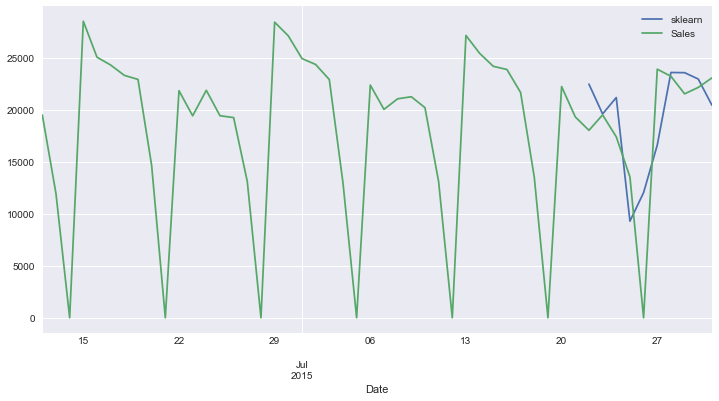

In [5]:
linear_regression = get_sklearn_wrapper(RandomForestRegressor, n_estimators=100, clip_predictions_lower=0.)
(linear_regression.fit(X[:-10], y[:-10])
                  .predict(X[-10:])
                  .merge(y, left_index=True, right_index=True, how='outer')
                  .tail(50)
                  .plot()
);